In [ ]:
# Welcome to Cursor
from data import *

# 1. Try generating with command K on a new line. Ask for a pytorch script of a feedforward neural network
# 2. Then, select the outputted code and hit chat. Ask if there's a bug. Ask how to improve.
# 3. Try selecting some code and hitting edit. Ask the bot to add residual layers.
# 4. To try out cursor on your own projects, go to the file menu (top left) and open a folder.
# 导入所需的包
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torchvision.models import resnet18
from torch.autograd import Variable

# 定义图像预处理方法
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# 加载预训练的ResNet-18模型
model = resnet18(pretrained=True)
model.eval()

# 定义生成器网络
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(10, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return x
# 定义PGD攻击

def pgd_attack(model, x, y, epsilon, alpha, attack_iters):
    x_adv = Variable(x.data, requires_grad=True)
    for i in range(attack_iters):
        h_adv = model(x_adv)
        loss = nn.CrossEntropyLoss()(h_adv, y)
        model.zero_grad()
        loss.backward()
        x_adv.grad.sign_()
        x_adv.data = x_adv.data + alpha*x_adv.grad.data
        x_adv.data = torch.max(torch.min(x_adv.data, x+epsilon), x-epsilon)
        x_adv.data = torch.clamp(x_adv.data, 0, 1)
    return x_adv.data

#定义生成器的流程

def generate_adversarial_example(model, x, y, p, epsilon_max, lambda_val, generator):
    # 提取图像x的特征z
    x = transform(x)
    x = x.unsqueeze(0)
    features = model(x).detach().numpy()


    # 使用生成器网络g(z)得到缩放因子ε
    z = torch.from_numpy(features)
    epsilon = generator(z.float()).item()

    # 如果ε > ε_max，则令ε = ε_max
    if epsilon > epsilon_max:
        epsilon = epsilon_max

    # 使用PGD攻击得到扰动后的图像x'
    x_pgd = pgd_attack(model, x, y, epsilon, 1, 10)
    return x_pgd
    # 计算损失函数
    # loss = -torch.log(nn.Softmax(dim=1)(model(x_pgd))[0][y]) + lambda_val*torch.norm(x_pgd - x, p=p)

    # # 反向传播和优化
    # generator.zero_grad()
    # loss.backward()
    # optimizer = optim.Adam(generator.parameters(), lr=0.01)
    # optimizer.step()



def train_generator(x, y, model, generator, optimizer, p=2, epsilon=0.3, balance=1.0):
    generator.train() # 设置为训练模式
    z = model(x)

    # 前向传播，得到缩放因子
    epsilon_scaled = generator(z) # 得出最大的攻击幅度， 为什么我们可以通过logits 得出攻击幅度

    # 如果epsilon_scaled超过最大范围，则将其截断
    epsilon_scaled = torch.clamp(epsilon_scaled, max=epsilon)

    # 扰动输入图像，得到扰动后的图像
    x_adv = pgd_attack()

    # 前向传播，得到扰动后的图像的预测概率
    y_pred = model(x_adv)

    # 计算损失函数
    loss = -torch.log(y_pred[:, y]).mean() + balance * torch.norm(x_adv - x, p=p)
    # 反向传播，更新生成器网络
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    return x_adv, loss.item()

num_epochs = 10

generator = Generator()
optimizer = torch.optim.Adam(generator.parameters(), lr=0.01)
for epoch in range(num_epochs):
    for x, y,index  in imagenet10_dataloader_bs32:
        x_adv, loss = train_generator(x, y, model, generator, optimizer, p=2, epsilon=0.3, balance=1.0)
        #每训练一个epoch，打印一下损失
    print(f"Epoch {epoch+1}, loss = {loss:.4f}")


In [ ]:
acc = [[0],[0]]
a = acc[0]
a[0] = a[0]+1
print(acc,a)

In [6]:
from data import *
from model import *
from torchvision import models
model = resnet18_10cls
r18   = models.resnet18(pretrianed=True)

dataset = dataset_list[0]
dataloader = dataloader_list[0]

for i,(images,label,index) in enumerate(dataloader):
    pred = r18(images).argmax(dim=1)[:7]
    print(pred)
    break

dataset.img_path[:7]


8 * 6 
# 0 1 2 4 5 6 7 8 
# 0   9, 3, 3, 4, 4, 8   0
# 1   0, 4, 3, 2, 8, 6   0
# 2   4, 4, 1, 1, 4, 6   0
# 4   4, 3, 0, 3, 6, 4   2
# 5   2, 4, 7, 5, 8, 6   1
# 6   3, 2, 0, 5, 4, 8   0
# 7   4, 4, 5, 4, 6, 6   0
# 8   6, 0, 8, 6, 5, 6   1    

44/48    

TypeError: __init__() got an unexpected keyword argument 'pretrianed'

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline

point_list = [[[0.0,0.0],[0.0,0.0]],[[0.6561,800],[0.33461,800]],[[0.6607,1200],[0.3885,1200]],[[0.6600,1300],[0.3861,1300]],[[0.6515,1480],[0.4069,1480]],[[0.6623,1670],[0.4123,1670]],[[0.6723,1890],[0.4146,1890]],[[0.6646,1940],[0.4030,1940]],[[0.6740,2140],[0.4361,2140]],[[0.6670,2200],[0.4477,2200]]]
point_list = np.array(point_list)

# 创建数据
x1 = point_list[:,0,1]
y1 = point_list[:,0,0]

x2 = point_list[:,1,1]
y2 = point_list[:,1,0]
# 设置平滑度
smoothness = 3

# 创建插值函数
spl_1 = make_interp_spline(x1, y1, k=smoothness)
spl_2 = make_interp_spline(x2, y2, k=smoothness)
# 插值
x1_new = np.linspace(x1.min(), x1.max(), 300)
y1_new = spl_1(x1_new)

x2_new = np.linspace(x2.min(), x2.max(), 300)
y2_new = spl_2(x2_new)

plt.rcParams['figure.dpi'] = 180
plt.figure(figsize=(9,5))
# 使用 lineplot 绘制曲线，并添加标签
sns.lineplot(x=x1_new, y=y1_new, label='Untarget',linewidth=2)
sns.lineplot(x=x2_new, y=y2_new, label='Target',linewidth=2)


# 添加图例
plt.legend()
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# 添加横纵坐标名称
plt.xlabel('Patch Size (pixel)',fontsize=13)
plt.ylabel('ASR',fontsize=13)

# 显示图形
plt.grid(True)
plt.show()


x = []
for i in range(300):
    x.append((x1_new[i],y1_new[i]))

max(y1_new[90:110])/max(y1_new),max(y2_new[140:160])/max(y2_new)


In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline


x1 = [[0,0.3984,0.4523,0.4877,0.5038,0.5092,0.4976,0.4853,0.4831,0.4884], # 有目标mask
      [0,0.2462,0.3069,0.3499,0.3846,0.4000,0.4300,0.4284,0.4331,0.4330],  # 有目标 slice 
      [0,0.3984,0.4838,0.5292,0.5407,0.5815,0.5753,0.5838,0.5738,0.5707], # 有目标mask + slice
      [0,0.8484,0.8438,0.8315,0.8392,0.8369,0.8353,0.8292,0.8338,0.8299], # 无 目标 mask
      [0,0.9100,0.9038,0.9031,0.8969,0.9038,0.8915,0.8938,0.8923,0.8946], # 无目标slice
      [0,0.8577,0.8415,0.8438,0.8323,0.8431,0.8446,0.8446,0.8492,0.8562]] # 无目标 mask + slice


y = np.array([0,1/14,1/7,3/14,2/7,3/7,4/7,5/7,6/7,1])




# 设置平滑度
smoothness = 3

# 创建插值函数
spl_1 = make_interp_spline(x1, y1, k=smoothness)
spl_2 = make_interp_spline(x2, y2, k=smoothness)
# 插值
x1_new = np.linspace(x1.min(), x1.max(), 300)
y1_new = spl_1(x1_new)

x2_new = np.linspace(x2.min(), x2.max(), 300)
y2_new = spl_2(x2_new)

plt.rcParams['figure.dpi'] = 180
plt.figure(figsize=(8,5))
# 使用 lineplot 绘制曲线，并添加标签
sns.lineplot(x=x1_new, y=y1_new, label='non-target')
sns.lineplot(x=x2_new, y=y2_new, label='target')


# 添加图例
plt.legend()

# 添加横纵坐标名称
plt.xlabel('Patch size(pixel)')
plt.ylabel('Accuracy(%)')

# 显示图形
plt.show()

In [ ]:
# coding=utf-8

import numpy as np
import matplotlib.pyplot as plt

# densenet
y_m = [0.4215,0.5277,0.4546,0.5892,0.5199,0.4884,0.3754,0.55,0.5592,0.4677]
y_s = [0.4453,0.4138,0.4377,0.4792,0.4338,0.4331,0.4038,0.4546,0.4378,0.3708]
y_m_s = [0.5446,0.5538,0.5092,0.5869,0.5607,0.5707,0.4799,0.5984,0.5708,0.5046]

# 无fintune
y_m_ = [0.3015,0.3830,0.3177,0.3746,0.3469,0.3331,0.2907,0.3938,0.3631,0.3907]
y_s_ = [0.3553,0.3238,0.3353,0.3607,0.3223,0.3215,0.3046,0.3531,0.3430,0.2969]
y_m_s_ = [0.3754,0.3700,0.3530,0.3838,0.3515,0.3638,0.3207,0.4107,0.3646,0.3746]

plt.rcParams['font.sans-serif'] = ['Arial']  # 如果要显示中文字体,则在此处设为：SimHei
plt.rcParams['axes.unicode_minus'] = False  # 显示负号

x = np.array([1, 2, 3, 4, 5, 6,7,8,9,10])
VGG_supervised = np.array(y_s)
VGG_unsupervised = np.array(y_s_)
# ourNetwork = np.array([2.0205495, 2.6509762, 3.1876223, 4.380781, 6.004548, 9.9298])

# label在图示(legend)中显示。若为数学公式,则最好在字符串前后添加"$"符号
# color：b:blue、g:green、r:red、c:cyan、m:magenta、y:yellow、k:black、w:white、、、
# 线型：-  --   -.  :    ,
# marker：.  ,   o   v    <    *    +    1
plt.figure(figsize=(7*1.4, 7))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框


plt.plot(x, VGG_supervised, marker='o', color="red", label=r'$\mathbf{Fine-tune \; ResNet18 \;\; M_2}$', linewidth=1.5)
plt.plot(x, VGG_unsupervised, marker='o', color="blue", label=r'$\mathbf{ResNet18  \;\; M_2}$', linewidth=1.5)


group_labels = ['Penguin','Dog','Leopard','Airplane','Airship','ship','Soccer','Car','Truck','Orange']   # x轴刻度的标识
plt.xticks(x, group_labels, fontsize=12, fontweight='bold',rotation=30)  # 默认字体大小为10
plt.yticks(fontsize=12, fontweight='bold',rotation=15)
# plt.title("example", fontsize=12, fontweight='bold')  # 默认字体大小为12
plt.xlabel("Label", fontsize=13, fontweight='bold')
plt.ylabel("ASR", fontsize=13, fontweight='bold')

plt.ylim(0.25,0.65)

# plt.legend()          #显示各曲线的图例
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = r'\usepackage{mathptmx}'
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman'] + mpl.rcParams['font.serif']

plt.plot([1, 2, 3], [4, 5, 6], label='Line 1')
plt.plot([1, 2, 3], [2, 4, 6], label='Line 2')

plt.legend(prop={'size': 12, 'weight': 'bold'}, 
           title_fontsize=14, 
           title='Legend',
           fancybox=True,
           edgecolor='black',
           facecolor='white',
           shadow=True,
           bbox_to_anchor=(1.05, 1),
           loc='upper left',
           borderaxespad=0.)

plt.show()



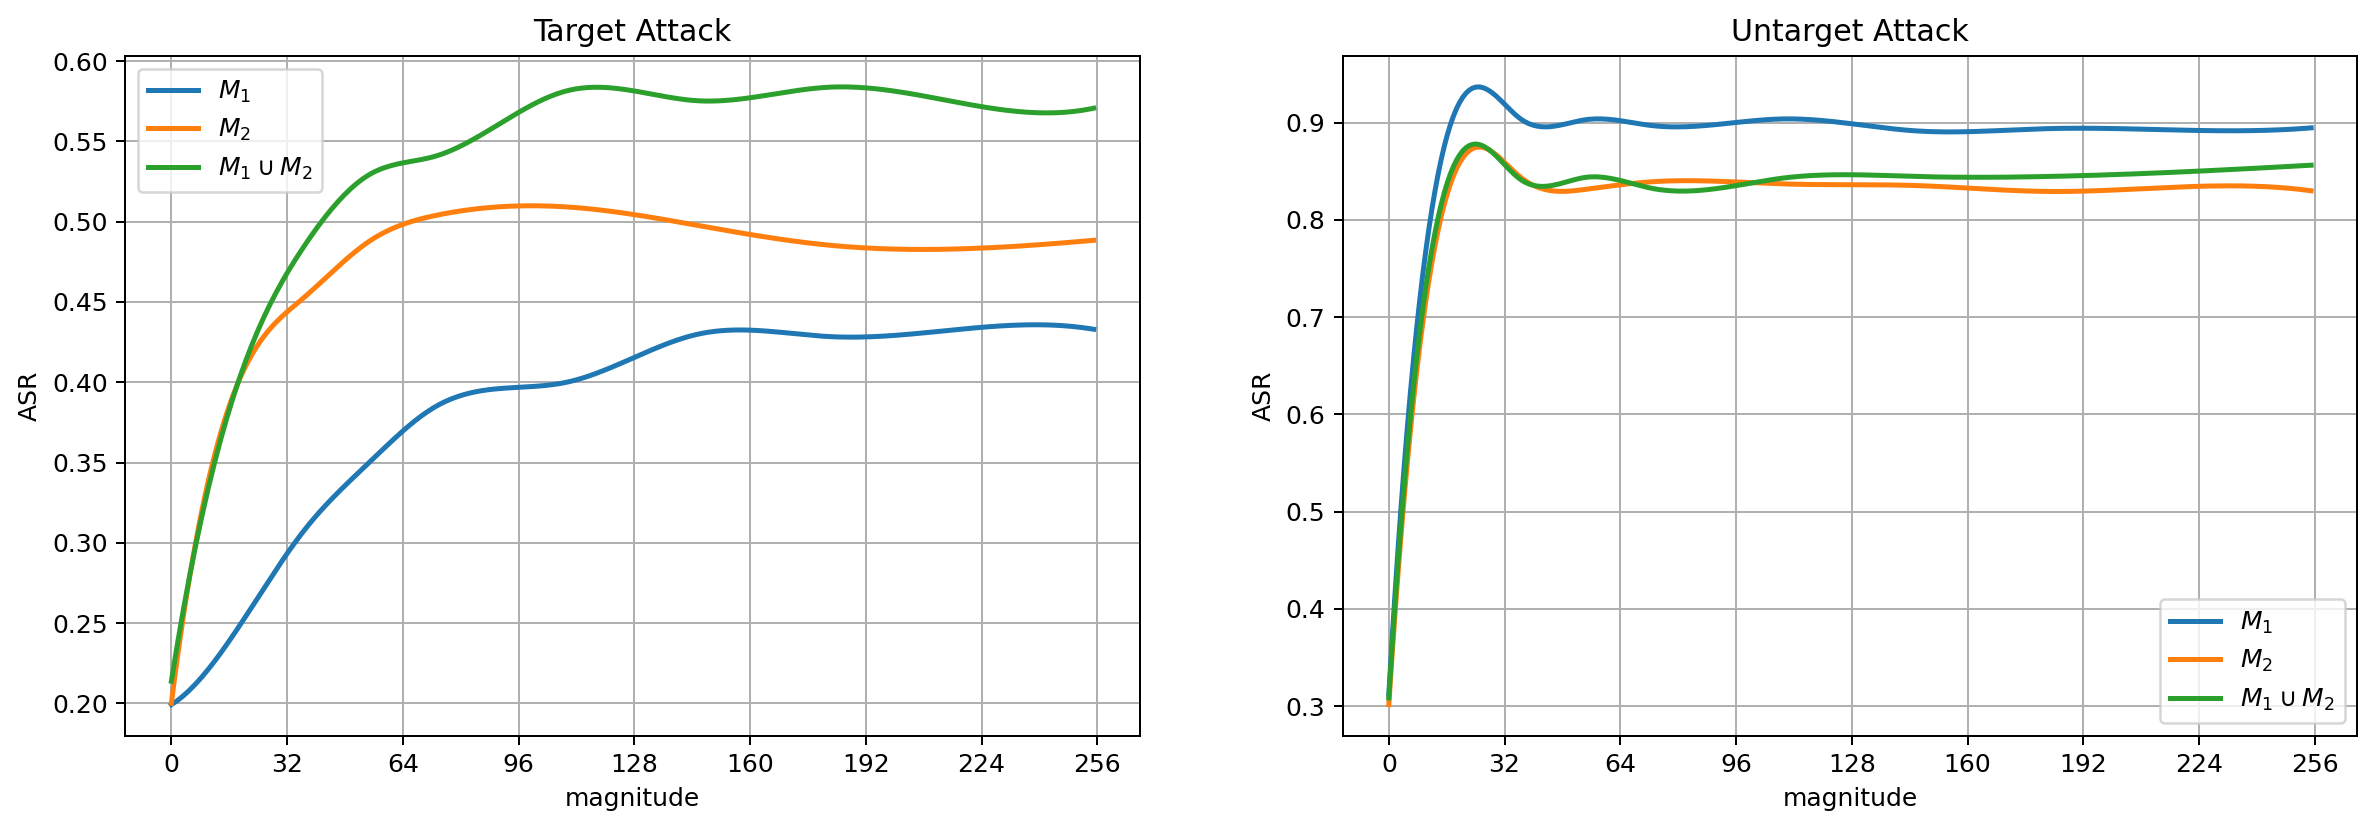

In [1]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline


y = np.array([[0.2000,0.3984,0.4523,0.4877,0.5038,0.5092,0.4976,0.4853,0.4831,0.4884], # 有目标mask
              [0.1992,0.2462,0.3069,0.3499,0.3846,0.4000,0.4300,0.4284,0.4331,0.4330],  # 有目标 slice 
              [0.2138,0.3984,0.4838,0.5292,0.5407,0.5815,0.5753,0.5838,0.5738,0.5707], # 有目标mask + slice
              [0.3015,0.8484,0.8438,0.8315,0.8392,0.8369,0.8353,0.8292,0.8338,0.8299], # 无 目标 mask
              [0.3123,0.9100,0.9038,0.9031,0.8969,0.9038,0.8915,0.8938,0.8923,0.8946], # 无目标slice
              [0.3084,0.8577,0.8415,0.8438,0.8323,0.8431,0.8446,0.8446,0.8492,0.8562]] )# 无目标 mask + slice


x = np.array([0,1/14,1/7,3/14,2/7,3/7,4/7,5/7,6/7,1])
x = x *255
plt.rcParams['figure.dpi'] = 180
fig, axes = plt.subplots(1,2,figsize=(16, 5))

# 设置平滑度
smoothness = 3

for i in range(2):
    # 创建插值函数
    spl_1 = make_interp_spline(x, y[i*3], k=smoothness)
    spl_2 = make_interp_spline(x, y[i*3+1], k=smoothness)
    spl_3 = make_interp_spline(x, y[i*3+2], k=smoothness)
    # 插值
    x1_new = np.linspace(x.min(), x.max(), 300)
    y1_new = spl_1(x1_new)

    x2_new = np.linspace(x.min(), x.max(), 300)
    y2_new = spl_2(x2_new)

    x3_new = np.linspace(x.min(), x.max(), 300)
    y3_new = spl_3(x3_new)




    # 使用 lineplot 绘制曲线，并添加标签
    sns.lineplot(x=x2_new, y=y2_new, label=r'$M_1$',ax = axes[i],linewidth=2)
    sns.lineplot(x=x1_new, y=y1_new, label=r'$M_2$',ax=axes[i],linewidth=2)
    
    sns.lineplot(x=x3_new, y=y3_new, label=r'$M_1 \cup M_2$',ax = axes[i],linewidth=2)
    # 添加横纵坐标名称
    axes[i].grid(True)
    axes[i].set_xticks(range(0,288,32))

    axes[i].set_xlabel('magnitude')
    axes[i].set_ylabel('ASR')
    if i ==0:
        axes[i].set_title('Target Attack')
    if i ==1:
        axes[i].set_title('Untarget Attack')
    


# 添加图例
plt.legend()



# 显示图形
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

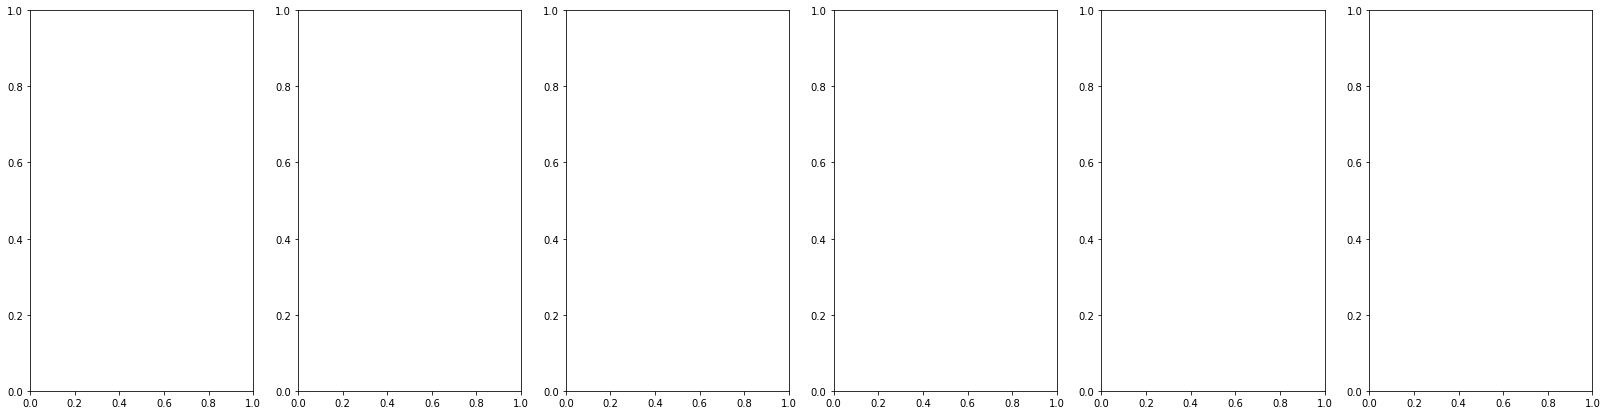

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 创建一个6x8的网格，并设置子图间的间距
fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(28,7))
# 图像大小为400*400
# 左右间距为 350 50 
# 上下间距为150
plt.rcParams['figure.dpi'] = 120

sub_pos = []

for i in range(1):
    sub_col = []
    sub_pos.append(sub_col)
    for j in range(6):
        temp = ((350+j*400)/2800,(140+i*500)/700,400/2800,400/700)
        sub_pos[i].append(temp)
        



# 读取图片并填充到网格中
index = [0]
for i in range(1):
    for j in range(6):
        ax = axs[i,j]
        ax.set_position(sub_pos[i][j])
        image_path = f"/opt/Data/imagenet-10/Physical_image/{index[i]}_{j+1}.jpg"  # 假设图片文件名为image_1.jpg、image_2.jpg...
        image = imread(image_path)
        ax.imshow(image)
        ax.axis('off')

# 显示网格
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 创建一个空白的图像
fig, ax = plt.subplots(figsize=(28, 48))

# 加载图像
img = mpimg.imread('image.jpg')

# 将图像添加到Axes对象中
ax.imshow(img)
ax.axis('off')
# 调整左侧、顶部和底部的边界位置
plt.subplots_adjust(left=0.1, top=0.5, bottom=0.5)

plt.show()
# 保存图像
# plt.savefig('output.png', dpi=300)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 创建一个800x600像素的图像
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# 子图位置和大小信息的列表
subplots = [
    (0.1, 0.1, 0.4, 0.4), # 子图1左上角位置为(0, 0)，宽度和高度都为整个图像的一半
    (0.5, 0, 0.5, 0.5), # 子图2左上角位置为(0.5, 0)，宽度和高度都为整个图像的一半
    (0, 0.5, 0.5, 0.5), # 子图3左上角位置为(0, 0.5)，宽度和高度都为整个图像的一半
    (0.5, 0.5, 0.5, 0.5), # 子图4左上角位置为(0.5, 0.5)，宽度和高度都为整个图像的一半
]

# 为每个子图创建一个子图对象，并设置它在图像上的像素坐标
for ax, subplot in zip(axs.flat, subplots):
    ax.set_position(subplot)

    


# 在子图中绘制一条曲线
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
axs[0, 0].plot(x, y)

axs[0, 0].set_title('Sin Curve')

# 在子图中绘制一张图片
img = np.random.rand(50, 50)
axs[1, 1].imshow(img, cmap='gray')
axs[1, 1].set_title('Random Image')

# 显示图像
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# 创建一个6x8的网格，并设置子图间的间距
fig, axs = plt.subplots(nrows=8, ncols=6, figsize=(28,48.5))
# 图像大小为400*400
# 左右间距为 350 50 
# 上下间距为150
plt.rcParams['figure.dpi'] = 120

sub_pos = []

for i in range(8):
    sub_col = []
    sub_pos.append(sub_col)
    for j in range(6):
        temp = ((350+j*400)/2800,(140+i*500)/4850,400/2800,400/4850)
        sub_pos[i].append(temp)
        



# 读取图片并填充到网格中
index = [8,7,6,5,4,2,1,0]
for i in range(8):
    for j in range(6):
        ax = axs[i,j]
        ax.set_position(sub_pos[i][j])
        image_path = f"/opt/Data/imagenet-10/Physical_image/{index[i]}_{j+1}.jpg"  # 假设图片文件名为image_1.jpg、image_2.jpg...
        image = imread(image_path)
        ax.imshow(image)
        ax.axis('off')

# 显示网格
plt.show()

In [1]:

from data import *
from model import *
from torchvision import models

from torch import nn
import torch
model = nn.Sequential(
    nn.Conv1d(in_channels=10, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.AdaptiveMaxPool1d(1),  # 使用自适应最大池化进行全局池化
    nn.Flatten(),  # 展平成(batch_size, num_features)
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)


a = torch.rand((8,10))
model(a)

/home/sstl/miniconda3/envs/py38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/sstl/miniconda3/envs/py38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/home/sstl/miniconda3/envs/py38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Wei

RuntimeError: Given groups=1, weight of size [16, 10, 3], expected input[1, 8, 10] to have 10 channels, but got 8 channels instead

In [ ]:
import torch



model_list =[2,5,2,1,0,11,2,4,8,1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


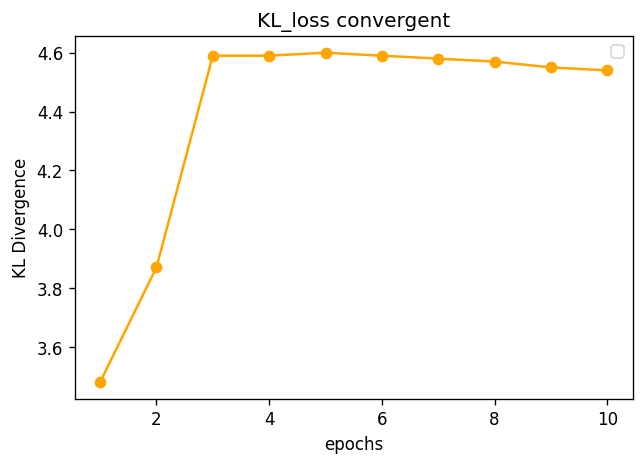

In [9]:
import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3.48, 3.87, 4.59, 4.59, 4.60, 4.59, 4.58, 4.57, 4.55, 4.54]

# 创建一个新的绘图
plt.figure()

# 绘制折线图
plt.plot(x, y, marker='o', linestyle='-', color='orange')

# 添加标题和标签
plt.title('KL_loss convergent')
plt.xlabel('epochs')
plt.ylabel('KL Divergence')

# 添加图例
plt.legend()

# 显示图形
plt.show()


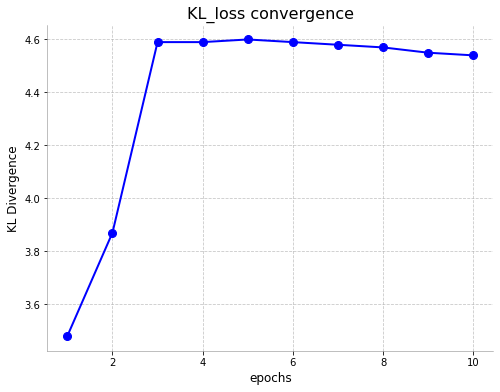

In [4]:
import matplotlib.pyplot as plt

# 示例数据
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [3.48, 3.87, 4.59, 4.59, 4.60, 4.59, 4.58, 4.57, 4.55, 4.54]

# 创建一个新的绘图，设置画布大小和背景颜色
plt.figure(figsize=(8, 6), facecolor='white')

# 绘制折线图，设置线条样式、颜色和标记点
plt.plot(x, y, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)

# 添加标题和标签，设置字体大小和颜色
plt.title('KL_loss convergence', fontsize=16, color='black')
plt.xlabel('epochs', fontsize=12, color='black')
plt.ylabel('KL Divergence', fontsize=12, color='black')

# 设置坐标轴刻度字体大小和颜色
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# 添加网格线，设置样式和透明度
plt.grid(True, linestyle='--', alpha=0.7)



# 设置边框颜色和宽度
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# 显示图形
plt.show()


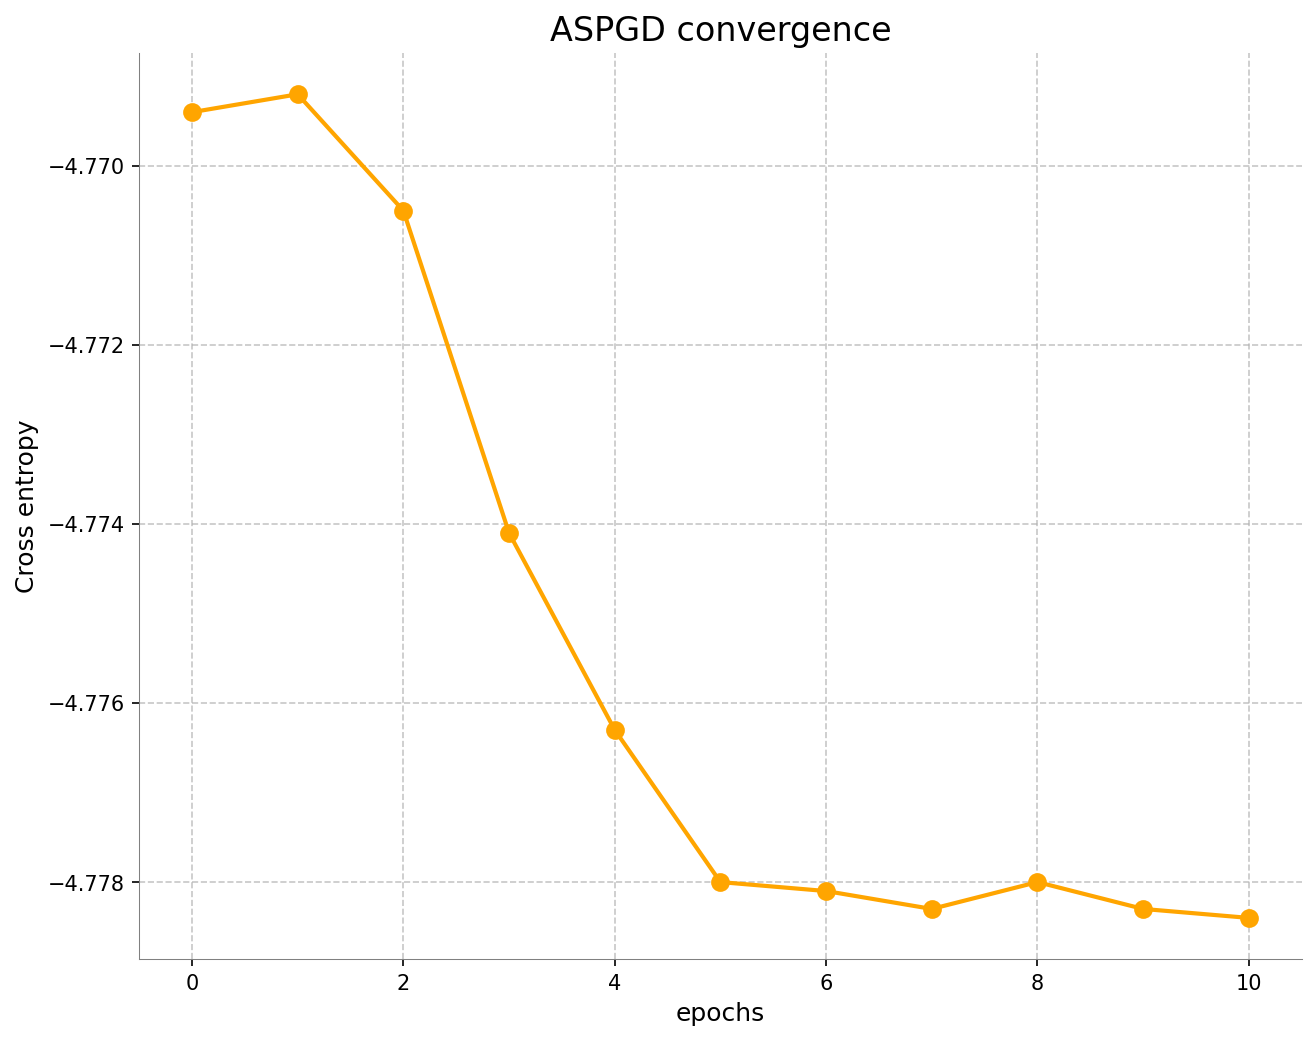

In [20]:
import matplotlib.pyplot as plt

# 示例数据
x = [0,1, 2, 3, 4, 5, 6, 7, 8, 9,10]
#y = [-4.7694, -4.7692, -4.7705, -4.7741, -4.7763,-4.7689,-4.7798,-4.7780,-4.7783,-4.7784,-4.7784]
y = [-4.7694, -4.7692, -4.7705, -4.7741, -4.7763,-4.7780,-4.7781,-4.7783,-4.7780,-4.7783,-4.7784]
# 创建一个新的绘图，设置画布大小和背景颜色
plt.figure(figsize=(10, 8), facecolor='white')
plt.rcParams['figure.dpi'] = 180
# 绘制折线图，设置线条样式、颜色和标记点
plt.plot(x, y, marker='o', linestyle='-', color='orange', linewidth=2, markersize=8)

# 添加标题和标签，设置字体大小和颜色
plt.title('ASPGD convergence', fontsize=16, color='black')
plt.xlabel('epochs', fontsize=12, color='black')
plt.ylabel('Cross entropy', fontsize=12, color='black')

# 设置坐标轴刻度字体大小和颜色
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')

# 添加网格线，设置样式和透明度
plt.grid(True, linestyle='--', alpha=0.7)

# 设置边框颜色和宽度
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

# 显示图形
plt.show()


In [1]:
import cv2

meta = cv2.imread('/home/sstl/fht/patchfusion/show_img/mask0.png')
meta

array([[[141, 135,  35],
        [141, 140,  33],
        [139, 149,  31],
        ...,
        [142, 111,  45],
        [142, 118,  42],
        [142, 118,  42]],

       [[126, 176,  42],
        [111, 191,  69],
        [ 70, 213, 139],
        ...,
        [142, 126,  39],
        [142, 122,  40],
        [142, 109,  46]],

       [[103, 197,  83],
        [122, 180,  48],
        [139, 147,  31],
        ...,
        [142, 124,  39],
        [140, 146,  31],
        [142, 128,  38]],

       ...,

       [[142, 126,  39],
        [141, 132,  36],
        [140, 143,  32],
        ...,
        [141, 131,  37],
        [141, 131,  37],
        [142, 110,  45]],

       [[141, 135,  35],
        [141, 134,  36],
        [141, 133,  36],
        ...,
        [142, 122,  40],
        [142, 124,  39],
        [142, 110,  45]],

       [[141, 139,  34],
        [141, 135,  35],
        [142, 127,  38],
        ...,
        [142, 118,  42],
        [142, 121,  41],
        [142, 109,  46]]